In [22]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as mtp
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report


In [23]:
df=pd.read_csv('user_data.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [24]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [25]:
#x=df.iloc[:,[2,3]]

cols=['Age','EstimatedSalary']
x=df[cols]
y=df.iloc[:,-1]

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

In [28]:
# classifier=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=0)
# classifier.fit(X_train,y_train)

#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [29]:
y_pred=classifier.predict(X_test)
y_pred

C:\Users\pravi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [30]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
216    0
259    1
49     0
238    0
343    1
Name: Purchased, Length: 120, dtype: int64

In [11]:
print(accuracy_score(y_pred,y_test))

0.9166666666666666


In [12]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        75
           1       0.93      0.84      0.88        45

    accuracy                           0.92       120
   macro avg       0.92      0.90      0.91       120
weighted avg       0.92      0.92      0.92       120



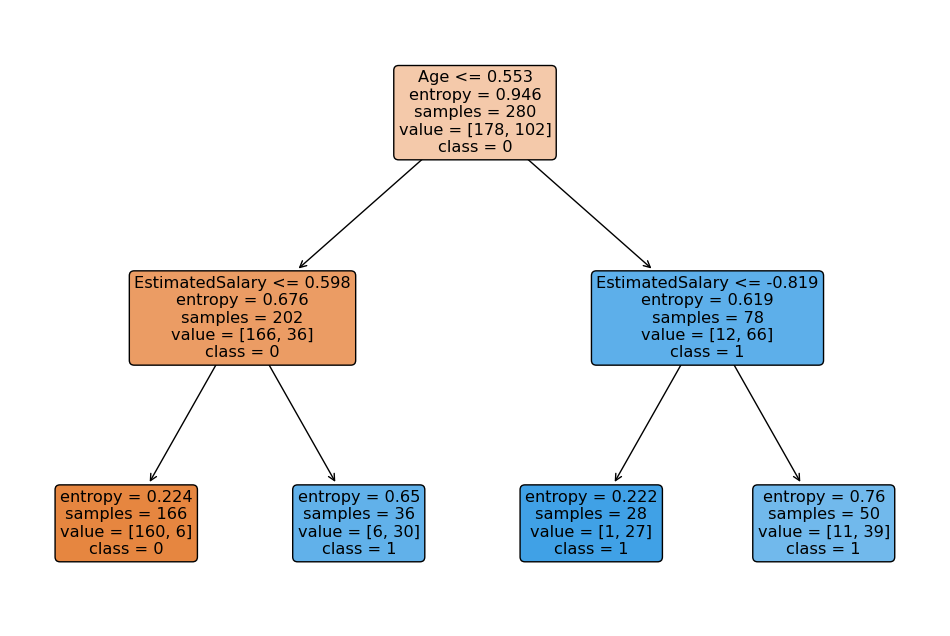

In [19]:
#from sklearn.tree import export_text,plot_tree
tree_text = export_text(classifier, feature_names=cols)

#print(tree_text)

# Visualize the decision tree
mtp.figure(figsize=(12,8))
plot_tree(classifier, filled=True, rounded=True, feature_names=cols, class_names=['0', '1'])
mtp.show()